# Walmart Sales Forecast
This notebook explores the sales data of 45 Wal-Mart locations. Exploritory data analysis was perfomed at the store and deparment level and the finding were used to forecast the sales.

    Functionality Setting

In [1]:
import warnings
warnings.filterwarnings("ignore")

    Dependencies

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import datetime

# 1. Data Imports
The sales and store data was collected from [Walmart Recruiting's Kaggle Competition](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting). This dataset only includes the influence of 4 holidays. Entering this project with the assumption that consumer spending is heavily influenced by holidays so a [second source](https://www.timeanddate.com/holidays/us/2010?hol=17) was utilized to collect all relevant consumer events and commonly observed U.S. holidays. The datasets were then consolidated in a [separate script](https://github.com/octaviaisom/Walmart-Sales-Forecast/blob/master/holidates.py) (due to its extended runtime) and saved in ``` sales_updated.csv ```.

In [3]:
csv = pd.read_csv("data/sales_updated.csv")
sales = pd.DataFrame(csv)

sales.tail()

Store  Dept        Date  Weekly_Sales  IsHoliday
421565     45    98   9/28/2012        508.37      False
421566     45    98   10/5/2012        628.10      False
421567     45    98  10/12/2012       1061.02      False
421568     45    98  10/19/2012        760.01      False
421569     45    98  10/26/2012       1076.80      False

In [4]:
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [5]:
sales.Date = pd.to_datetime(sales.Date)

In [6]:
csv = pd.read_csv("data/stores.csv")
stores = pd.DataFrame(csv)

stores.tail()

Store Type    Size
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [7]:
stores.info()
stores.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

In [8]:
csv = pd.read_csv("data/holidays.csv")
holidays = pd.DataFrame(csv)

holidays.head()

Holiday        Date
0   Black Friday  2010-11-26
1   Black Friday  2011-11-25
2   Black Friday  2012-11-23
3   Black Friday  2013-11-29
4  Christmas Day  2010-12-25

In [9]:
holidays.Date = pd.to_datetime(holidays.Date)

# 2. EDA

In [10]:
#setting color pallete for charts
palette = flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(palette)

plt.style.use('seaborn-darkgrid')


## Record Counts
Review missing values

In [11]:
sales.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [12]:
45*81*143 == len(sales)

False

In [13]:
#Departments with missing weekly sales
sales.groupby('Dept').nunique().query("Date<143")

Store  Dept  Date  Weekly_Sales  IsHoliday
Dept                                            
39        5     1    16            12          2
43        5     1    12             6          2
47       37     1   138           277          2
51       37     1   131           780          2
77       37     1    35            58          2
78       37     1    82            38          2
99       37     1    94           311          2

In [14]:
#Stores with missing weekly sales
sales.groupby('Store').nunique().query("Date<143")

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
Index: []

In [15]:
#Number of unique depts per store
sales.groupby('Store').nunique().sort_values(['Dept'])

Store  Dept  Date  Weekly_Sales  IsHoliday
Store                                            
43         1    61   143          6292          2
37         1    62   143          6864          2
42         1    62   143          6452          2
44         1    62   143          6548          2
33         1    63   143          5714          2
36         1    63   143          5742          2
38         1    63   143          6715          2
30         1    64   143          6517          2
3          1    72   143          8688          2
5          1    72   143          8594          2
9          1    73   143          8627          2
35         1    74   143          9298          2
45         1    74   143          9381          2
39         1    75   143          9713          2
12         1    75   143          9432          2
26         1    76   143          9661          2
16         1    76   143          9137          2
17         1    76   143          9511          2
8          1    76   143          9667          2
31         1    76   143          9931          2
22         1    76   143          9439          2
7          1    76   143          9391          2
40         1    77   143          9724          2
32         1    77   143          9985          2
41         1    77   143          9864          2
29         1    77   143          9133          2
28         1    77   143          9933          2
1          1    77   143         10042          2
25         1    77   143          9551          2
6          1    77   143         10076          2
10         1    77   143         10126          2
14         1    77   143          9884          2
21         1    77   143          9376          2
24         1    77   143          9958          2
23         1    77   143          9830          2
34         1    78   143          9911          2
18         1    78   143          9665          2
27         1    78   143         10026          2
11         1    78   143          9924          2
4          1    78   143         10098          2
2          1    78   143         10088          2
20         1    78   143         10015          2
19         1    79   143          9944          2
15         1    79   143          9640          2
13         1    79   143         10293          2

## Sales Analysis
High-level analysis of sales and holiday's potential influence on seasonality

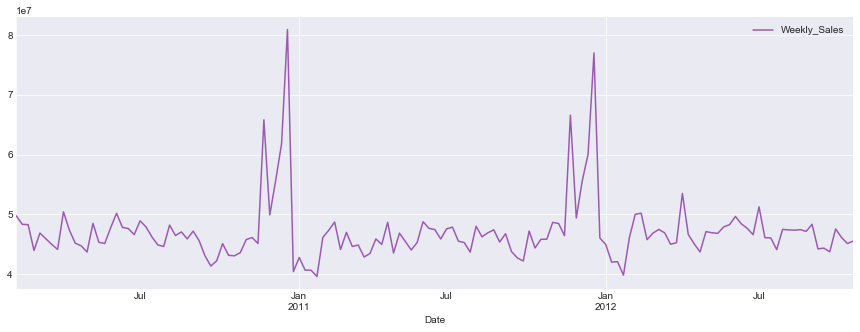

In [16]:
#Total weekly sales
byDate = sales.groupby('Date',sort=False).sum()
byDate.plot(y='Weekly_Sales', figsize=(15,5))

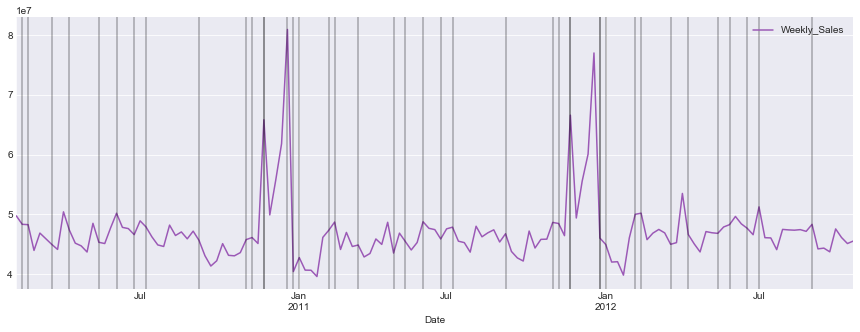

In [17]:
#Total weekly sales with holiday markers
final_wk = max(byDate.index)
ax = byDate.plot(y='Weekly_Sales', figsize=(15,5))

for index, row in holidays[holidays.Date <= final_wk].iterrows():
    holiday = row['Date']
    ax.axvline(x=holiday, c='k', alpha = 0.3)

Day-of and trailing/leading

# Sales by Store
How does the stores' size/type influences sales?

In [18]:
byStore = sales.reset_index().groupby('Store', as_index=False).sum()
byStore = pd.merge(byStore, stores, on='Store', how='left')
byStore.head()

Store      index    Dept  Weekly_Sales  IsHoliday Type    Size
0      1   52464646  454749  2.224028e+08     2724.0    A  151315
1      2  157281275  455425  2.753824e+08     2727.0    A  202307
2      3  225895482  370825  5.758674e+07     2410.0    B   37392
3      4  355960752  457340  2.995440e+08     2738.0    A  205863
4      5  398556711  371526  4.547569e+07     2397.0    B   34875

In [19]:
byStore.nunique()

Store           45
index           45
Dept            45
Weekly_Sales    45
IsHoliday       45
Type             3
Size            40
dtype: int64

In [20]:
#Formatting df for visuals
byStore = byStore[["Store", "Weekly_Sales", "Type", "Size"]]
byStore.head()

Store  Weekly_Sales Type    Size
0      1  2.224028e+08    A  151315
1      2  2.753824e+08    A  202307
2      3  5.758674e+07    B   37392
3      4  2.995440e+08    A  205863
4      5  4.547569e+07    B   34875

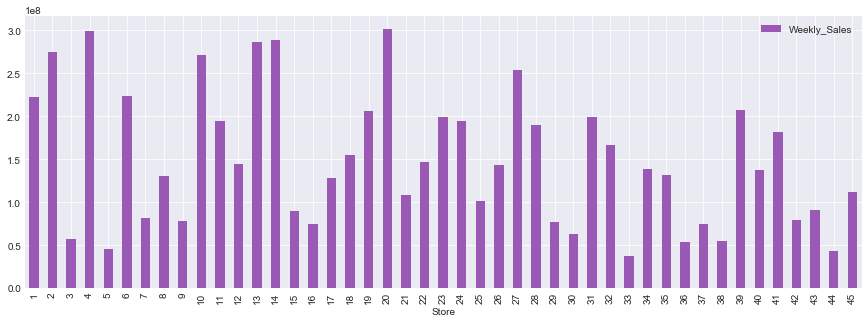

In [21]:
#Total sales for the entire period
byStore.plot(x='Store',y='Weekly_Sales',kind='bar',figsize=(15,5))

SOME STORE THAT OUTPERFORM OTHERS...POTENTIALLY INFLUENCED BY Type SIZE LOCATION ETC...

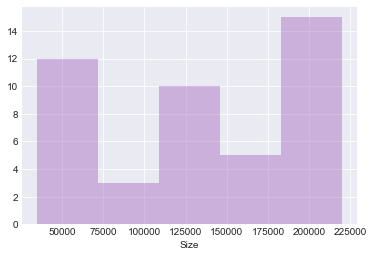

In [22]:
sns.distplot(byStore['Size'], kde=False, bins=5)

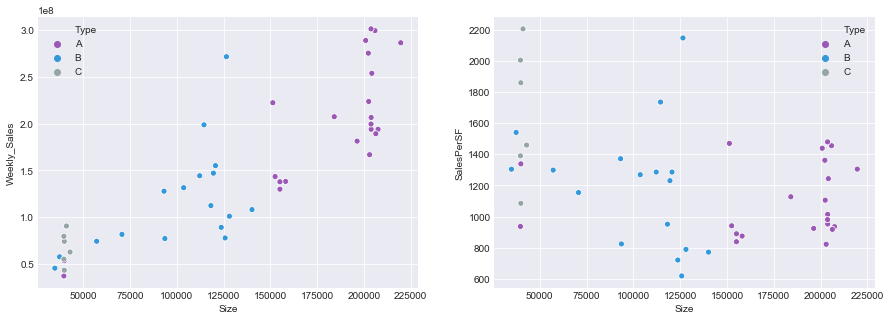

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(x='Size',y='Weekly_Sales',data=byStore, hue='Type', ax=ax1)

byStore["SalesPerSF"] = byStore['Weekly_Sales']/byStore['Size']
sns.scatterplot(x='Size',y='SalesPerSF',data=byStore, hue='Type', ax=ax2)

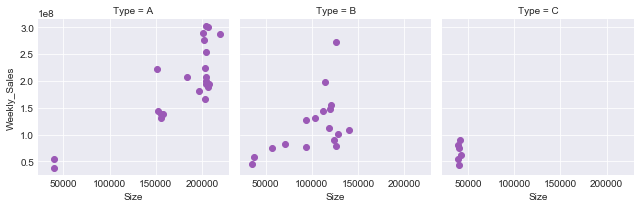

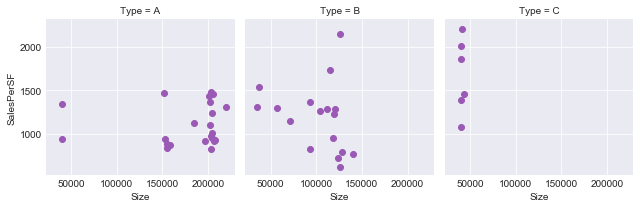

In [24]:
#Size vs Weekly Sales and Sales per Sq. Ft.
fgrid = sns.FacetGrid(data=byStore, col='Type')
fgrid.map(plt.scatter,'Size', 'Weekly_Sales')

#Size vs Weekly Sales and Sales per Sq. Ft.
fgrid = sns.FacetGrid(data=byStore, col='Type')
fgrid.map(plt.scatter,'Size', 'SalesPerSF')

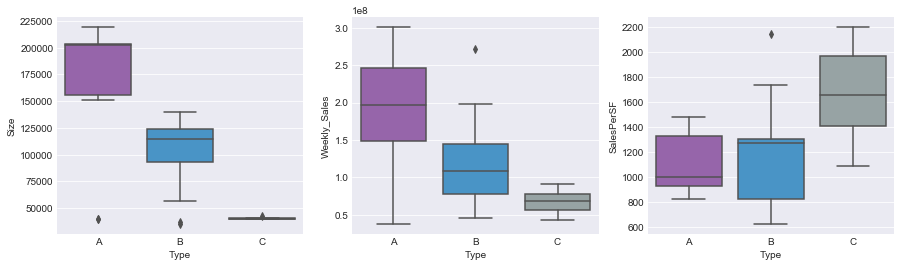

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,4))
sns.boxplot(x='Type', y='Size', data=byStore, ax=ax1)
sns.boxplot(x='Type', y='Weekly_Sales', data=byStore, ax=ax2)
sns.boxplot(x='Type', y='SalesPerSF', data=byStore, ax=ax3)

types seem to be based soley on size....smaller store making best use of space...larger store appear to be average ....medium have lowest performance

...type influenced by size...bc previous does not provided the desired detail...dig deeper into size..cluster to further analyze the sales behavior across stores SIZES...

Cluster Stores
in hope to find stronger relationships...use ml to cluter store based on size

In [26]:
byStorex = byStore[['Weekly_Sales', 'Size','SalesPerSF']]
byStorex.head()

Weekly_Sales    Size   SalesPerSF
0  2.224028e+08  151315  1469.800144
1  2.753824e+08  202307  1361.210640
2  5.758674e+07   37392  1540.081704
3  2.995440e+08  205863  1455.064550
4  4.547569e+07   34875  1303.962406

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6) #Based on the distinct clustering in the above $/sf graph
kmeans.fit(byStorex)
byStorex['Cluster'] = kmeans.labels_
byStorex.head()

Weekly_Sales    Size   SalesPerSF  Cluster
0  2.224028e+08  151315  1469.800144        3
1  2.753824e+08  202307  1361.210640        1
2  5.758674e+07   37392  1540.081704        2
3  2.995440e+08  205863  1455.064550        1
4  4.547569e+07   34875  1303.962406        2

NOW THAT THE STORE ARE CLUSTERED...MORE MEANINGFUL inferences...size's influence on sales

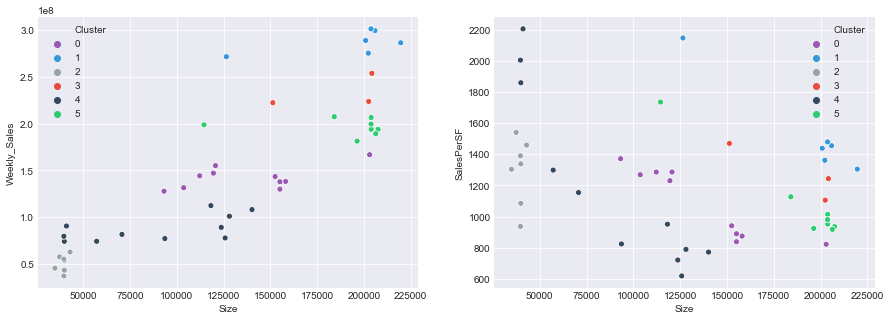

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(x='Size',y='Weekly_Sales',data=byStorex, hue='Cluster', ax=ax1, palette=palette)
sns.scatterplot(x='Size',y='SalesPerSF',data=byStorex, hue='Cluster', ax=ax2, palette=palette)

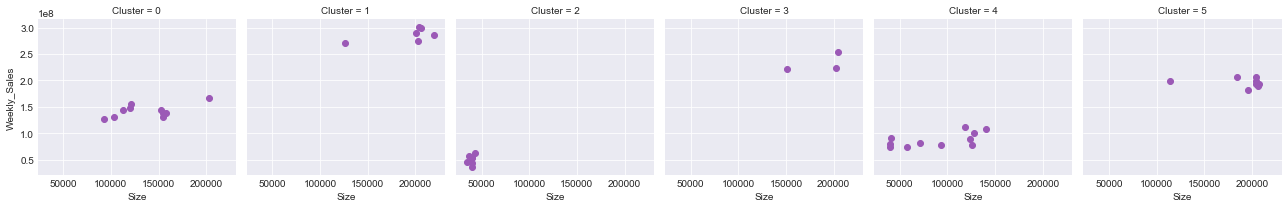

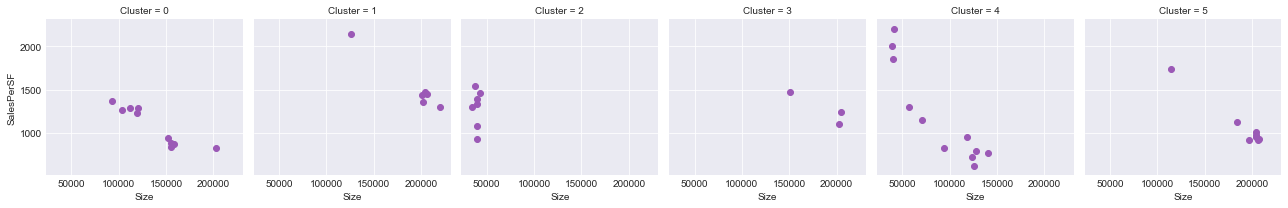

In [29]:
fgrid = sns.FacetGrid(data=byStorex, col='Cluster')
fgrid.map(plt.scatter,'Size', 'Weekly_Sales')

fgrid = sns.FacetGrid(data=byStorex, col='Cluster')
fgrid.map(plt.scatter,'Size', 'SalesPerSF')

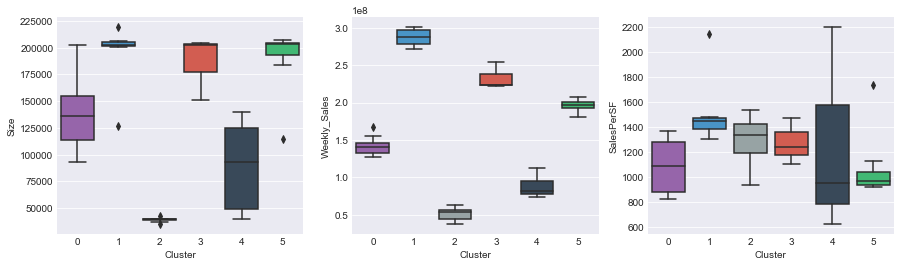

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,4))
sns.boxplot(x='Cluster', y='Size', data=byStorex, ax=ax1)
sns.boxplot(x='Cluster', y='Weekly_Sales', data=byStorex, ax=ax2)
sns.boxplot(x='Cluster', y='SalesPerSF', data=byStorex, ax=ax3)

FINAL STORE SALES THOUGHTS...

# Sales by Dept
Which departments are influenced by seasonality?

In [31]:
#number of unique departments
sales['Dept'].nunique()

81

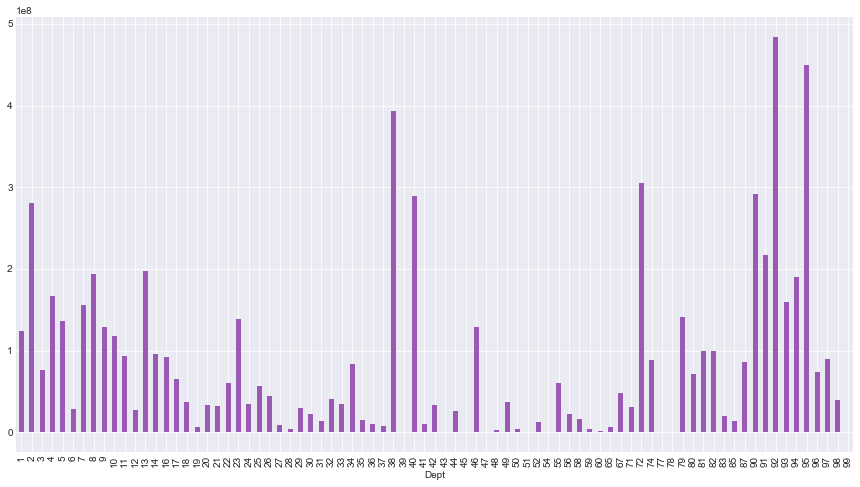

In [32]:
byDept = sales.groupby(['Dept']).sum()
byDept['Weekly_Sales'].plot(kind='bar',figsize=(15,8))

as expected prices vary very heavily among depts...negative sales (loss) observed...filter store with negative sales

In [33]:
byDept.query('Weekly_Sales<=0')

Store  Weekly_Sales  IsHoliday
Dept                                
47    12641      -4962.93      187.0

## DICKEY-FULLER TEST
determine stationarity...lags!!

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
salesx = pd.read_csv("data/sales.csv")
salesx

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]

In [36]:
#median number of records for depts with NO missing week
salesx.groupby('Dept').nunique().sort_values('Date').query('Date==143')['Weekly_Sales'].median()

5873.0

In [37]:
#Depts with missing weeks
missing_wks = salesx.groupby('Dept').nunique().sort_values('Date').query('Date<143')
missing_wks

Store  Dept  Date  Weekly_Sales  IsHoliday
Dept                                            
43        5     1    12             6          2
39        5     1    16            12          2
77       37     1    35            58          2
78       37     1    82            38          2
99       37     1    94           311          2
51       37     1   131           780          2
47       37     1   138           277          2

In [38]:
weeks = list(missing_wks.index)
weeks

[43, 39, 77, 78, 99, 51, 47]

In [39]:
missing_sum = salesx.query(f"Dept in {weeks}").groupby('Dept').sum()
missing_sum

Store  Weekly_Sales  IsHoliday
Dept                                
39      228        177.98        1.0
43      287         14.32        1.0
47    12641      -4962.93       55.0
51    32135      30572.83       85.0
77     3275      49344.27       48.0
78     4504       1714.71       26.0
99    18480     358149.85       95.0

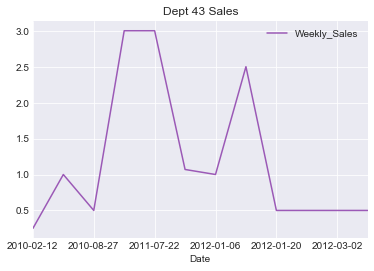

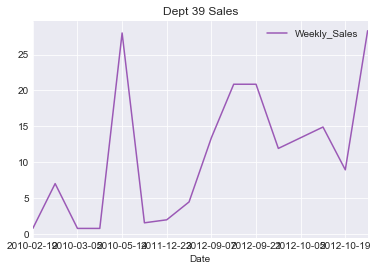

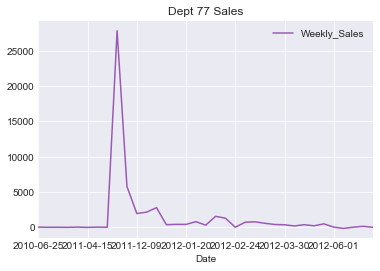

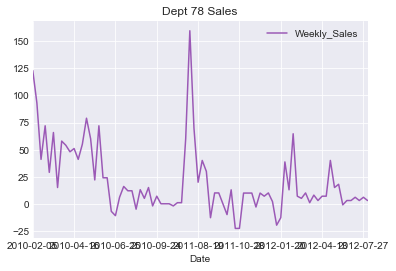

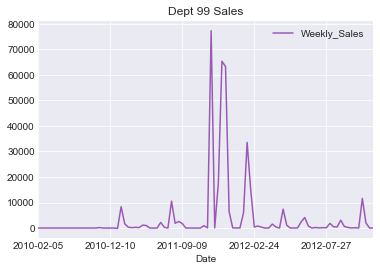

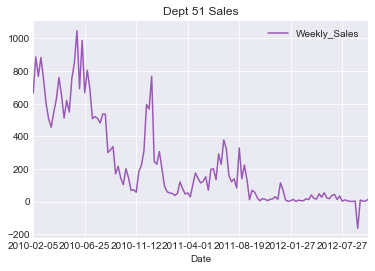

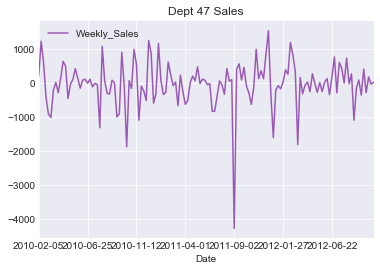

In [40]:
for dept in missing_wks.index:
    salesx.query(f"Dept=={dept}").groupby('Date').sum().plot(y='Weekly_Sales', title=f"Dept {dept} Sales")

In [41]:
stat_list = []
dept_list = []
depts = salesx.Dept.unique()
for dept in depts:
    if dept in weeks:
        continue
        
    byDeptx = salesx.query(f"Dept=={dept}").groupby('Date').sum()
    dftest = adfuller(byDeptx['Weekly_Sales'], maxlag=55)
    p_value = dftest[1]
    lags = dftest[2]

    if p_value <= 0.05:
        stationarity = 1
        
    else:
        stationarity = 0
    
    dept_list.append(dept)
    stat_list.append(stationarity)

stationarities = pd.DataFrame({'Dept': dept_list,
                              'Stationary': stat_list})
stationarities.head()

Dept  Stationary
0     1           1
1     2           0
2     3           0
3     4           0
4     5           0

STATIONARY VS NON-STATIONARY...COUNT, %OF DEPT, %OF SALES DEPEND ON SEASONALITY/TRENDS??

In [42]:
statx = pd.merge(sales, stationarities, on='Dept', how='left')
statx = statx.groupby(['Stationary','Date'], as_index=False).sum()
statx.IsHoliday = statx.IsHoliday.astype('bool')
statx.head()

Stationary       Date  Store    Dept  Weekly_Sales  IsHoliday
0         0.0 2010-02-05  58915  122060   48039569.65      False
1         0.0 2010-02-12  58777  122443   46032611.95       True
2         0.0 2010-02-19  59111  122932   46248198.63       True
3         0.0 2010-02-26  58787  121808   42400522.75      False
4         0.0 2010-03-05  58709  121288   45083785.01      False

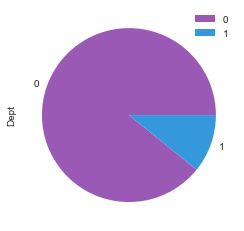

In [57]:
stationarities.groupby('Stationary').nunique().plot(y='Dept',kind='pie')

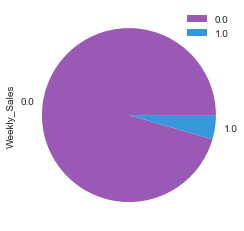

In [60]:
x = pd.merge(byDept, stationarities, on='Dept',how='left')
x.groupby('Stationary').sum().plot(y='Weekly_Sales',kind='pie')

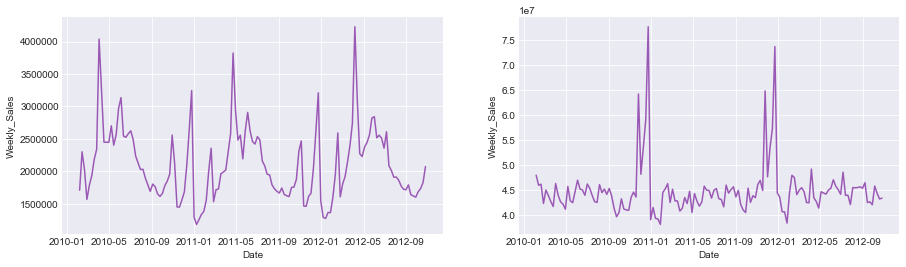

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4))
sns.lineplot(x="Date", y="Weekly_Sales",data=statx.query("Stationary==1"), ax=ax1)
sns.lineplot(x="Date", y="Weekly_Sales",data=statx.query("Stationary==0"), ax=ax2)

# 3. Forecasting
describe methodology..stationarity/DFT results determine model type(ARIMA or SARIMAx)...Eget felis eget nunc lobortis mattis. Vulputate sapien nec sagittis aliquam malesuada bibendum. Adipiscing tristique risus nec feugiat in fermentum posuere urna. Sapien pellentesque habitant morbi tristique senectus et netus. Faucibus scelerisque eleifend donec pretium vulputate sapien nec. Eget egestas purus viverra

## Seasonal Decomposition

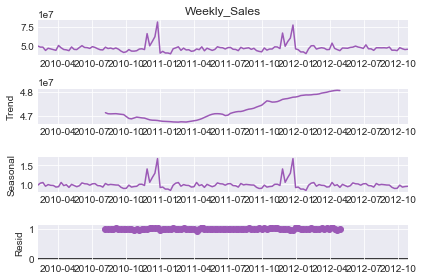

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(byDate['Weekly_Sales'], model='multiplicative')  # model='mul' also works
result.plot();

# SARIMA

# SARIMAX

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima    

In [65]:
byDate.head()

Store    Dept  Weekly_Sales  IsHoliday
Date                                              
2010-02-05  65124  130557   49750740.50        0.0
2010-02-12  65082  131179   48336677.63     2956.0
2010-02-19  65610  131897   48276993.78     2977.0
2010-02-26  65045  130161   43968571.13        0.0
2010-03-05  64897  129670   46871470.30        0.0

original data only include...incorporae all US consumer spending event (super bowl, black friday) and other commonly observed holdays that would drive consumer spending...assuming all us stores!!!!
back to school...no exact date???

SOME HOLIDAYS HAVE TRAILING SALES (PREPARE)...SOME SAME DAY...